In [67]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [68]:
# load data
# - contains 29 csv files need to load all them

# list of all csv files
csv_files = []

# parent dir
parent_dir = 'data_2023_11_29\\neuroeconomics data'

# loop through all files in the directory
for file in os.listdir(parent_dir):
    # if file is csv file
    if file.endswith('.csv'):
        # append file to csv_files list
        csv_files.append(file)
        
len(csv_files)  

31

In [69]:
import pandas as pd

def load_csv_to_lst(file_name):
    '''
    This function takes a csv file and returns a list of dictionaries with an extra column 'user_id'
    '''
    # read csv file
    df = pd.read_csv(parent_dir + '\\' + file_name)
    
    # prune rows with NaN values in 'qid' column
    df = df[df['qid'].notna()]
    
    # create empty list
    ret_list = []
    
    # get user id from file name
    user_id = file_name.split('_')[0]
    
    # loop through all rows in the dataframe
    for index, row in df.iterrows():
        # create dictionary for each row
        dic = {}
        
        # add 'user_id' to the dictionary
        dic['user_id'] = user_id
        
        # add 'qid' and 'response' to the dictionary
        dic['qid'] = row['qid']
        dic['response'] = row['key_choise_response.keys']
        
        # append dictionary to the list
        ret_list.append(dic)

    return ret_list

def load_lst_to_df(lst):
    '''
    This function takes a list of dictionaries and returns a DataFrame
    '''
    # convert list of dictionaries to DataFrame
    df = pd.DataFrame(lst)
    return df

def load_csv_to_df(file_name):
    '''
    This function calls the load_csv_to_lst and load_lst_to_df functions
    '''
    # load csv file to list of dictionaries
    lst = load_csv_to_lst(file_name)
    
    # convert list of dictionaries to DataFrame
    df = load_lst_to_df(lst)
    
    return df

# # Assuming csv_files is a list of file paths
# csv_file_path = csv_files[0]

# # sanity check
# print(csv_file_path)

# # load csv file to DataFrame
# df = load_csv_to_df(csv_file_path)

# # sanity check
# df

In [70]:
data_list = []

# loop 
for i in range(len(csv_files)):
    lst = load_csv_to_lst(csv_files[i])

    data_list += lst
    
# convert list to df
df_data = pd.DataFrame(data_list)

print("df_data shape: ", df_data.shape) 

df_data shape:  (388, 3)


In [133]:
df_data.head()

,user_id,qid,response
0,MRAN01,expc2q1,b
1,MRAN01,ctrc4q1,b
2,MRAN01,papc2q1,a
3,MRAN01,papc1q1,a
4,MRAN01,expc4q1,b


In [134]:
# question we are interested in
master_qids = df_data[df_data['user_id'] == 'SBAC01']['qid'].unique()

# sort
master_qids.sort()

print("questions: ", len(master_qids))
print("master_qids: ", master_qids)

questions:  12
master_qids:  ['ctrc1q1' 'ctrc2q1' 'ctrc3q1' 'ctrc4q1' 'expc1q1' 'expc2q1' 'expc3q1'
 'expc4q1' 'papc1q1' 'papc1q2' 'papc2q1' 'papc2q2']


In [135]:
# remove all rows with qid not in master_qids
df_data = df_data[df_data['qid'].isin(master_qids)].reset_index(drop=True)

print("df_data shape: ", df_data.shape)
print("df_data: ", df_data.groupby('user_id').head())

df_data shape:  (372, 3)
df_data:      user_id      qid response
0    MRAN01  expc2q1        b
1    MRAN01  ctrc4q1        b
2    MRAN01  papc2q1        a
3    MRAN01  papc1q1        a
4    MRAN01  expc4q1        b
..      ...      ...      ...
360  SPAR01  expc4q1        b
361  SPAR01  papc1q2        b
362  SPAR01  ctrc4q1        b
363  SPAR01  papc1q1        a
364  SPAR01  papc2q2        b

[155 rows x 3 columns]


In [136]:
#  assert each user should have 12 question responses
assert df_data.groupby('user_id').size().max() == 12
assert df_data.groupby('user_id').size().min() == 12

In [137]:
# add gender column for id starting with 'SB' are males and MR are females
df_data_male = []
df_data_female = []

for index, row in df_data.iterrows():
    if row['user_id'][:2] == 'MR':    
        df_data_female.append(row)
    elif row['user_id'][:2] == 'SP':    
        df_data_male.append(row)
    elif row['user_id'][:2] == 'SB':    
        df_data_male.append(row)
    elif row['user_id'] in ['SBSD01', 'SBAP01']:
        df_data_female.append(row)
    else:
        print("error")
        print(row)

print(len(df_data_male)/12)
print(len(df_data_female)/12)

# convert list to df
df_data_male = pd.DataFrame(df_data_male)
df_data_female = pd.DataFrame(df_data_female)

17.0
14.0


# Graphs

-----------
## Choice in each question distribution

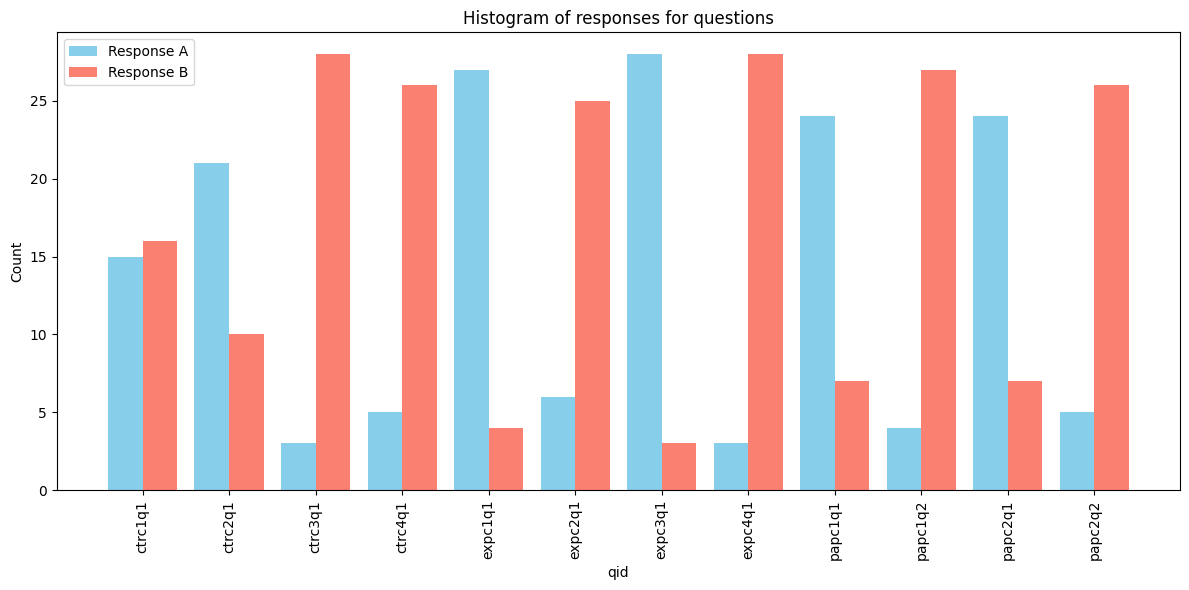

In [138]:
# plot the histogram with x as qid and y as count for both a and b
histogram_data = df_data.groupby(['qid', 'response']).size().reset_index(name='count')

# Create separate series for 'a' and 'b' responses
data_a = histogram_data[histogram_data['response'] == 'a']
data_b = histogram_data[histogram_data['response'] == 'b']

# Get numerical index positions for 'qid' values
qid_index = range(len(data_a))

# Plotting histogram for 'a' responses
plt.figure(figsize=(12, 6))
plt.bar(qid_index, data_a['count'], color='skyblue', label='Response A', width=0.4)

# Plotting histogram for 'b' responses with a slight shift in x-position
plt.bar([i + 0.4 for i in qid_index], data_b['count'], color='salmon', label='Response B', width=0.4)

plt.legend()
plt.title('Histogram of responses for questions')
plt.xlabel('qid')
plt.ylabel('Count')

# Assigning 'qid' values to x-axis ticks
plt.xticks([i + 0.2 for i in qid_index], data_a['qid'], rotation=90)
plt.tight_layout()

plt.show()

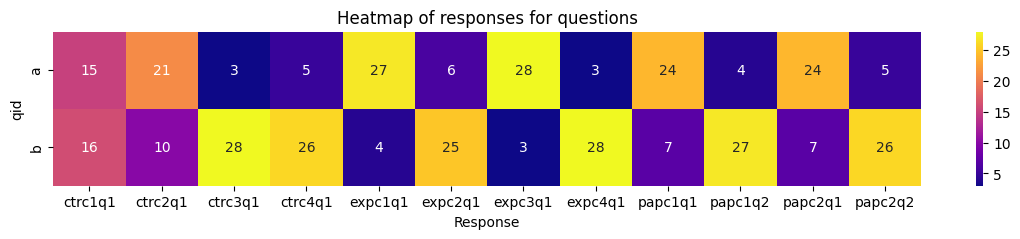

In [139]:
# heat map of responses for each question
histogram_data = df_data.groupby(['qid', 'response']).size().reset_index(name='count').copy()

# Create a pivot table with 'qid' as index, 'response' as columns and 'count' as values
pivot_table = histogram_data.pivot(index='response', columns='qid', values='count')

# Plotting heatmap
plt.figure(figsize=(14,2))
sns.heatmap(pivot_table, cmap='plasma', annot=True, fmt='g')
plt.title('Heatmap of responses for questions')
plt.xlabel('Response')
plt.ylabel('qid')

plt.show()

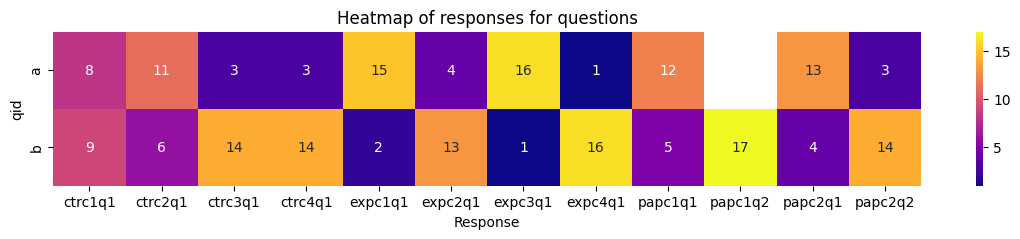

In [140]:
# heat map of responses for each question
histogram_data = df_data_male.groupby(['qid', 'response']).size().reset_index(name='count').copy()

# Create a pivot table with 'qid' as index, 'response' as columns and 'count' as values
pivot_table = histogram_data.pivot(index='response', columns='qid', values='count')

# Plotting heatmap
plt.figure(figsize=(14,2))
sns.heatmap(pivot_table, cmap='plasma', annot=True, fmt='g')
plt.title('Heatmap of responses for questions')
plt.xlabel('Response')
plt.ylabel('qid')

plt.show()

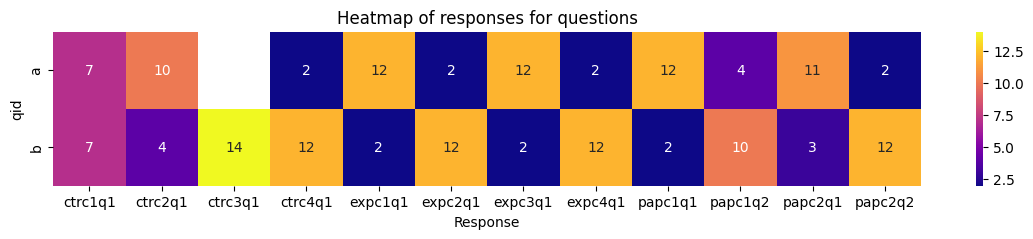

In [141]:
# heat map of responses for each question
histogram_data = df_data_female.groupby(['qid', 'response']).size().reset_index(name='count').copy()

# Create a pivot table with 'qid' as index, 'response' as columns and 'count' as values
pivot_table = histogram_data.pivot(index='response', columns='qid', values='count')

# Plotting heatmap
plt.figure(figsize=(14,2))
sns.heatmap(pivot_table, cmap='plasma', annot=True, fmt='g')
plt.title('Heatmap of responses for questions')
plt.xlabel('Response')
plt.ylabel('qid')

plt.show()

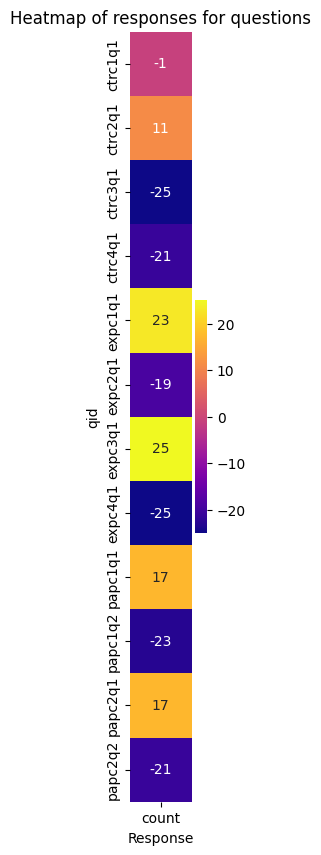

In [142]:
# warm and cool colors should be used for 'a' and 'b' responses respectively 
# for each question assign 'a' as 1 and 'b' as 0 to total responses to single question
histogram_data = df_data.groupby(['qid']).size().reset_index(name='count').copy()

# now loop through all the questions and assign score +1 for 'a' and -1 for 'b'
for index, row in df_data.iterrows():
    histogram_data.loc[histogram_data['qid'] == row['qid'], 'count'] = 0
    
for index, row in df_data.iterrows():
    if row['response'] == 'a':
        histogram_data.loc[histogram_data['qid'] == row['qid'], 'count'] += 1
    elif row['response'] == 'b':
        histogram_data.loc[histogram_data['qid'] == row['qid'], 'count'] -= 1
    else:
        print("error")
        print(row)
        
# plot a heatmap
plt.figure(figsize=(1,10))
sns.heatmap(histogram_data[['qid', 'count']].set_index('qid'), cmap='plasma', annot=True, fmt='g')
plt.title('Heatmap of responses for questions')
plt.xlabel('Response')
plt.ylabel('qid')

plt.show()

### Actiual map to be used in report


In [143]:
#  assert each user should have 12 question responses
assert df_data.groupby('user_id').size().max() == 12
assert df_data.groupby('user_id').size().min() == 12

In [144]:
# only keep if quid is equal to papc{1..4}q1
df_data_pap = df_data[df_data['qid'].isin(['papc1q1', 'papc1q2', 'papc2q1', 'papc2q2'])].reset_index(drop=True).copy()

df_data_pap

,user_id,qid,response
0,MRAN01,papc2q1,a
1,MRAN01,papc1q1,a
2,MRAN01,papc2q2,b
3,MRAN01,papc1q2,b
4,MRHS01,papc1q1,a
...,...,...,...
119,SBYM01,papc2q2,b
120,SPAR01,papc1q2,b
121,SPAR01,papc1q1,a
122,SPAR01,papc2q2,b


In [145]:
#  assert each user should have 12 question responses
assert df_data_pap.groupby('user_id').size().max() == 4
assert df_data_pap.groupby('user_id').size().min() == 4

In [146]:
# now store them in new data to plot
plt_data_pap = []

# columns will be 
# - qid
# - Positive Review Ratio (Postive Reviews / Total Reviews)  ex high/low
# - Star rating ex high/low
# - count of a responses
# - count of b responses

# loop through all quids
for qid in df_data_pap['qid'].unique():
    # get all rows with qid
    df = df_data_pap[df_data_pap['qid'] == qid]
    
    # now get count of a and b responses
    a_count = df[df['response'] == 'a'].shape[0]
    b_count = df[df['response'] == 'b'].shape[0]
    
    print("qid: ", qid)
    print("a_count: ", a_count)
    print("b_count: ", b_count)
    
    # qid papc1 had 2 question to measure positive review ratio and while keeping star rating same (High)
    
    if qid == "papc1q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_pap.append([qid, 'Low', 'Same', a_count, b_count])
        
    elif qid == "papc1q2":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_pap.append([qid, 'High', 'Same', a_count, b_count])
        
    elif qid == "papc2q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_pap.append([qid, 'Same', 'Low', a_count, b_count])
        
    elif qid == "papc2q2":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_pap.append([qid, 'Same', 'High', a_count, b_count])
        
    
# convert list to df
plt_data_pap = pd.DataFrame(plt_data_pap, columns=['qid', 'Positive_Review_Ratio', 'Star_Rating', 'a_count', 'b_count'])

print(plt_data_pap)

qid:  papc2q1
a_count:  24
b_count:  7
qid:  papc1q1
a_count:  24
b_count:  7
qid:  papc2q2
a_count:  5
b_count:  26
qid:  papc1q2
a_count:  4
b_count:  27
       qid Positive_Review_Ratio Star_Rating  a_count  b_count
0  papc2q1                  Same         Low       24        7
1  papc1q1                   Low        Same       24        7
2  papc2q2                  Same        High        5       26
3  papc1q2                  High        Same        4       27


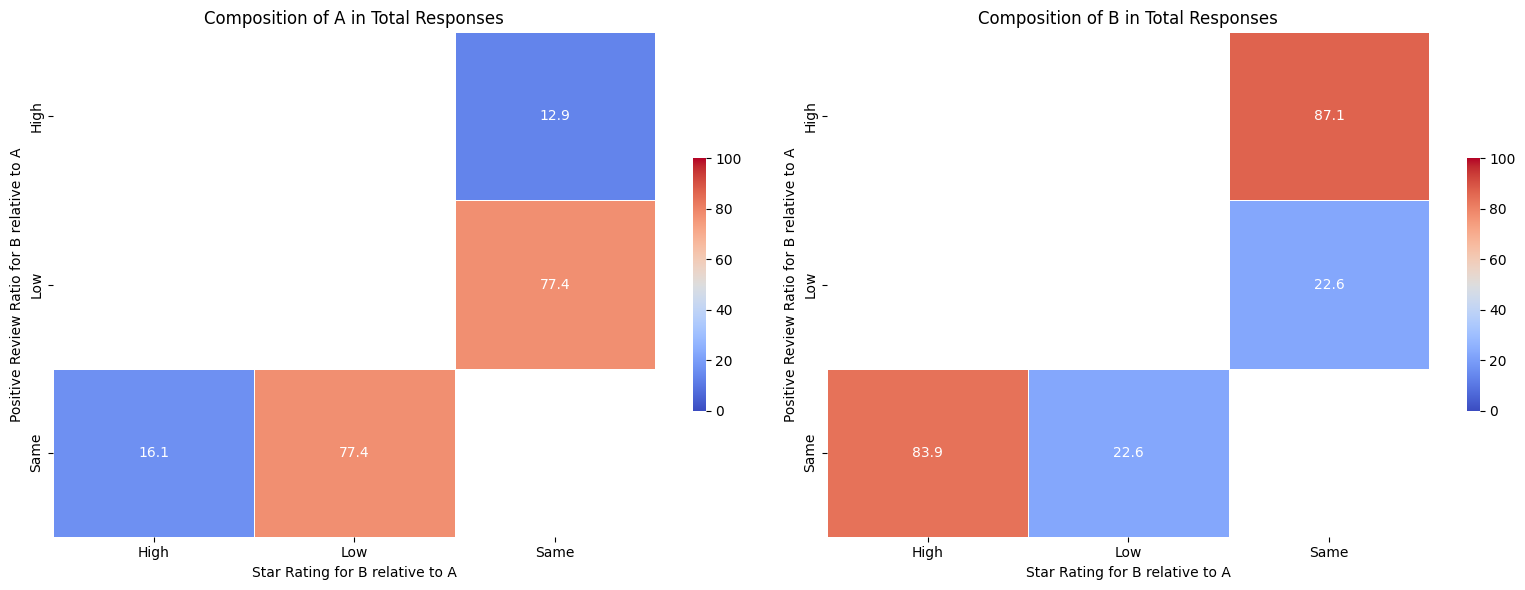

In [147]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

df = plt_data_pap.copy()

def calc_percentages(row):
    total_responses = row['a_count'] + row['b_count']
    percentage_a = (row['a_count'] / total_responses) * 100
    percentage_b = (row['b_count'] / total_responses) * 100
    return percentage_a, percentage_b

# Calculate the percentages for A and B
df[['percentage_a', 'percentage_b']] = df.apply(lambda row: calc_percentages(row), axis=1, result_type='expand')

# Plotting heatmap for percentage_a
sns.heatmap(df.pivot_table(index='Positive_Review_Ratio', columns='Star_Rating', values='percentage_a'),
            annot=True, cmap='coolwarm', fmt='.1f', vmax=100, vmin=0,
            annot_kws={"size": 10}, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[0])
axs[0].set_title('Composition of A in Total Responses')
axs[0].set_xlabel('Star Rating for B relative to A')
axs[0].set_ylabel('Positive Review Ratio for B relative to A')

# Plotting heatmap for percentage_b
sns.heatmap(df.pivot_table(index='Positive_Review_Ratio', columns='Star_Rating', values='percentage_b'),
            annot=True, cmap='coolwarm', fmt='.1f', vmax=100, vmin=0,
            annot_kws={"size": 10}, linewidths=.5, cbar_kws={"shrink": .5}, ax=axs[1])
axs[1].set_title('Composition of B in Total Responses')
axs[1].set_xlabel('Star Rating for B relative to A')
axs[1].set_ylabel('Positive Review Ratio for B relative to A')

plt.tight_layout()
plt.show()

In [148]:
print(df_data)

    user_id      qid response
0    MRAN01  expc2q1        b
1    MRAN01  ctrc4q1        b
2    MRAN01  papc2q1        a
3    MRAN01  papc1q1        a
4    MRAN01  expc4q1        b
..      ...      ...      ...
367  SPAR01  ctrc3q1        b
368  SPAR01  ctrc1q1        b
369  SPAR01  papc2q1        b
370  SPAR01  expc3q1        a
371  SPAR01  ctrc2q1        a

[372 rows x 3 columns]


In [149]:
# only keep if quid is equal to ctrc{1..4}q1
df_data_ctr = df_data[df_data['qid'].isin(['ctrc1q1', 'ctrc2q1', 'ctrc3q1', 'ctrc4q1'])].reset_index(drop=True)
df_data_ctr

,user_id,qid,response
0,MRAN01,ctrc4q1,b
1,MRAN01,ctrc3q1,b
2,MRAN01,ctrc1q1,a
3,MRAN01,ctrc2q1,a
4,MRHS01,ctrc2q1,a
...,...,...,...
119,SBYM01,ctrc1q1,a
120,SPAR01,ctrc4q1,b
121,SPAR01,ctrc3q1,b
122,SPAR01,ctrc1q1,b


In [150]:
plt_data_ctr = []

# columns will be
# - qid
# - Positive Review Ratio (Postive Reviews / Total Reviews)  ex high/low
# - Star rating ex high/low
# - count of a responses
# - count of b responses

# loop through all quids
for qid in df_data_ctr['qid'].unique():
    # get all rows with qid
    df = df_data_ctr[df_data_ctr['qid'] == qid]
    
    # now get count of a and b responses
    a_count = df[df['response'] == 'a'].shape[0]
    b_count = df[df['response'] == 'b'].shape[0]
    
    print("qid: ", qid)
    print("a_count: ", a_count)
    print("b_count: ", b_count)
    
    # qid papc1 had 2 question to measure positive review ratio and while keeping star rating same (High)
    
    if qid == "ctrc1q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_ctr.append([qid, 'Low', 'High', a_count, b_count])
        
    elif qid == "ctrc2q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_ctr.append([qid, 'Low', 'Low', a_count, b_count])
        
    elif qid == "ctrc3q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_ctr.append([qid, 'High', 'High', a_count, b_count])
        
    elif qid == "ctrc4q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]
        
        # append to list
        plt_data_ctr.append([qid, 'High', 'Low', a_count, b_count])
        
        
# convert list to df
plt_data_ctr = pd.DataFrame(plt_data_ctr, columns=['qid', 'Positive_Review_Ratio', 'Star_Rating', 'a_count', 'b_count'])

print(plt_data_ctr)

qid:  ctrc4q1
a_count:  5
b_count:  26
qid:  ctrc3q1
a_count:  3
b_count:  28
qid:  ctrc1q1
a_count:  15
b_count:  16
qid:  ctrc2q1
a_count:  21
b_count:  10
       qid Positive_Review_Ratio Star_Rating  a_count  b_count
0  ctrc4q1                  High         Low        5       26
1  ctrc3q1                  High        High        3       28
2  ctrc1q1                   Low        High       15       16
3  ctrc2q1                   Low         Low       21       10


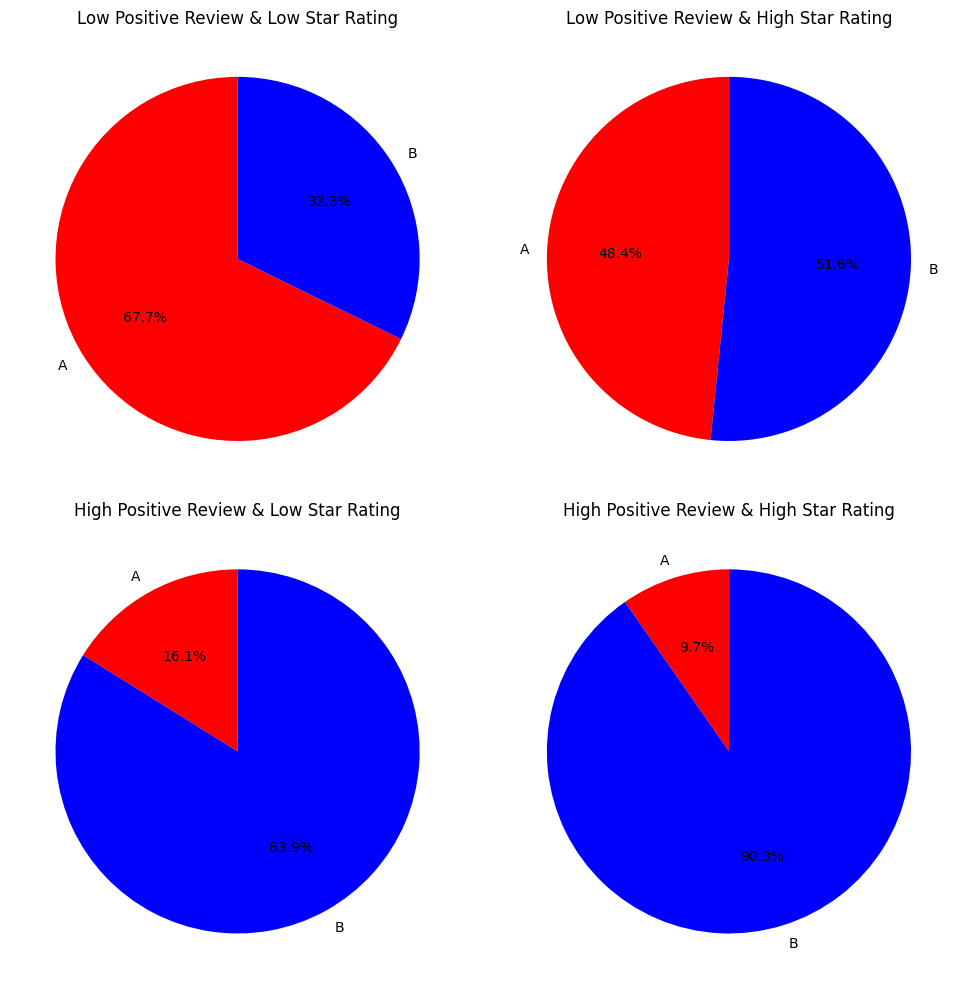

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
df = pd.DataFrame(plt_data_ctr)

# Create a 2x2 subplot grid for pie charts in the specified order
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Define order of subplots
subplot_order = [(1, 1), (0, 1), (0, 0), (1, 0)]

for idx, (i, j) in enumerate(subplot_order):
    if i == 0 and j == 0:
        subset_df = df[(df['Positive_Review_Ratio'] == 'Low') & (df['Star_Rating'] == 'Low')]
        title = 'Low Positive Review & Low Star Rating'
    elif i == 0 and j == 1:
        subset_df = df[(df['Positive_Review_Ratio'] == 'Low') & (df['Star_Rating'] == 'High')]
        title = 'Low Positive Review & High Star Rating'
    elif i == 1 and j == 0:
        subset_df = df[(df['Positive_Review_Ratio'] == 'High') & (df['Star_Rating'] == 'Low')]
        title = 'High Positive Review & Low Star Rating'
    else:
        subset_df = df[(df['Positive_Review_Ratio'] == 'High') & (df['Star_Rating'] == 'High')]
        title = 'High Positive Review & High Star Rating'
        
    composition_a = subset_df['a_count'].values[0], subset_df['b_count'].values[0]

    ax = axs[i, j]
    ax.pie(composition_a, colors=['Red', 'Blue'],
           labels=['A', 'B'], autopct='%1.1f%%', startangle=90)
    ax.set_aspect('equal')
    ax.set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()


In [152]:
# get all questions with quid expc{1..4}q1
df_data_exp = df_data[df_data['qid'].isin(['expc1q1', 'expc2q1', 'expc3q1', 'expc4q1'])].reset_index(drop=True).copy()

df_data_exp

,user_id,qid,response
0,MRAN01,expc2q1,b
1,MRAN01,expc4q1,b
2,MRAN01,expc1q1,a
3,MRAN01,expc3q1,a
4,MRHS01,expc1q1,a
...,...,...,...
119,SBYM01,expc2q1,b
120,SPAR01,expc4q1,b
121,SPAR01,expc2q1,b
122,SPAR01,expc1q1,a


In [153]:
plt_data_exp = []

# columns will be
# - qid
# - Positive Review Ratio (Postive Reviews / Total Reviews)  ex high/low
# - Star rating ex high/low
# - count of a responses
# - count of b responses

# loop through all quids
for qid in df_data_exp['qid'].unique():
    # get all rows with qid
    df = df_data_exp[df_data_exp['qid'] == qid]
    
    # now get count of a and b responses
    a_count = df[df['response'] == 'a'].shape[0]
    b_count = df[df['response'] == 'b'].shape[0]
    
    print("qid: ", qid)
    print("a_count: ", a_count)
    print("b_count: ", b_count)
    
    # qid papc1 had 2 question to measure positive review ratio and while keeping star rating same (High)
    
    if qid == "expc1q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]

        # append to list
        plt_data_exp.append([qid, 'Low', 'Same', a_count, b_count])
        
    elif qid == "expc2q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]

        # append to list
        plt_data_exp.append([qid, 'High', 'Same', a_count, b_count])
        
    elif qid == "expc3q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]

        # append to list
        plt_data_exp.append([qid, 'Same', 'Low', a_count, b_count])
        
    elif qid == "expc4q1":
        # get count of a responses
        a_count = df[df['response'] == 'a'].shape[0]
        
        # get count of b responses
        b_count = df[df['response'] == 'b'].shape[0]

        # append to list
        plt_data_exp.append([qid, 'Same', 'High', a_count, b_count])
        

# convert list to df
plt_data_exp = pd.DataFrame(plt_data_exp, columns=['qid', 'Positive_Review_Ratio', 'Star_Rating', 'a_count', 'b_count'])

plt_data_exp

qid:  expc2q1
a_count:  6
b_count:  25
qid:  expc4q1
a_count:  3
b_count:  28
qid:  expc1q1
a_count:  27
b_count:  4
qid:  expc3q1
a_count:  28
b_count:  3


,qid,Positive_Review_Ratio,Star_Rating,a_count,b_count
0,expc2q1,High,Same,6,25
1,expc4q1,Same,High,3,28
2,expc1q1,Low,Same,27,4
3,expc3q1,Same,Low,28,3


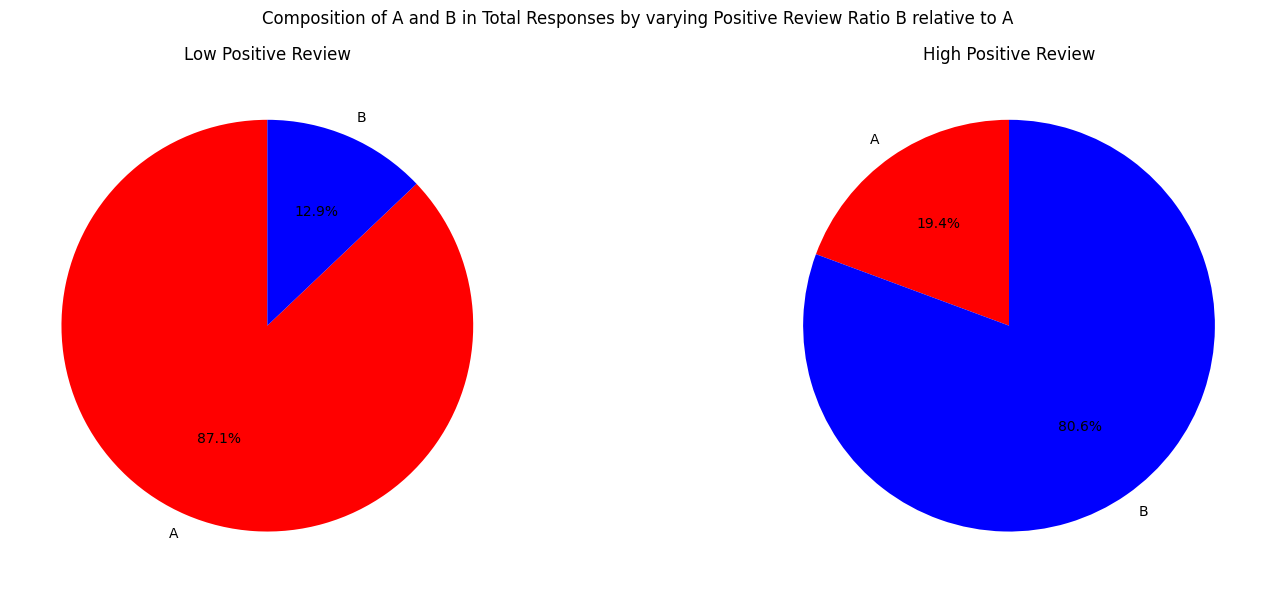

In [154]:
# Create DataFrame
df = pd.DataFrame(plt_data_exp)

# Create a 1x2 subplot grid for pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for 'expc1q1'
axs[0].pie(df[df['qid'] == 'expc1q1'][['a_count', 'b_count']].values[0], colors=['Red', 'Blue'],
            labels=['A', 'B'], autopct='%1.1f%%', startangle=90)
axs[0].set_aspect('equal')
axs[0].set_title('Low Positive Review')

# Plotting pie chart for 'expc2q1'
axs[1].pie(df[df['qid'] == 'expc2q1'][['a_count', 'b_count']].values[0], colors=['Red', 'Blue'],
            labels=['A', 'B'], autopct='%1.1f%%', startangle=90)
axs[1].set_aspect('equal')
axs[1].set_title('High Positive Review')

# Set the overall title for the entire figure
plt.suptitle('Composition of A and B in Total Responses by varying Positive Review Ratio B relative to A')

plt.tight_layout()
plt.show()

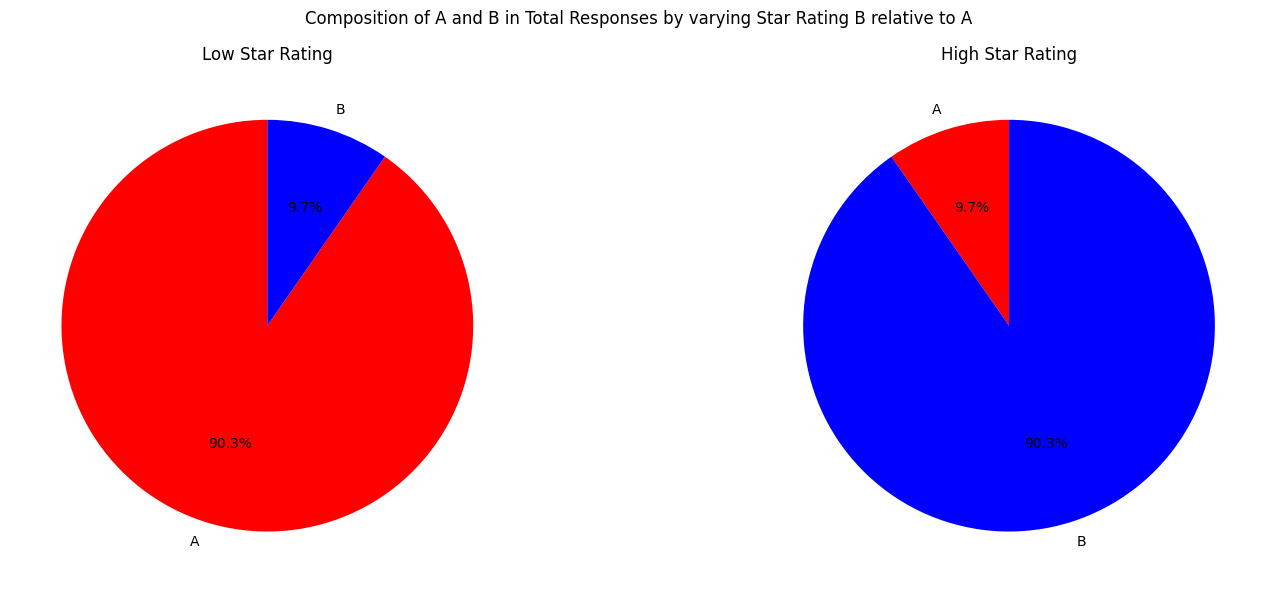

In [155]:
# now plot for star rating
# Create DataFrame
df = pd.DataFrame(plt_data_exp)

# Create a 1x2 subplot grid for pie charts
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting pie chart for 'expc3q1'
axs[0].pie(df[df['qid'] == 'expc3q1'][['a_count', 'b_count']].values[0], colors=['Red', 'Blue'],
            labels=['A', 'B'], autopct='%1.1f%%', startangle=90)

axs[0].set_aspect('equal')
axs[0].set_title('Low Star Rating')

# Plotting pie chart for 'expc4q1'

axs[1].pie(df[df['qid'] == 'expc4q1'][['a_count', 'b_count']].values[0], colors=['Red', 'Blue'],
            labels=['A', 'B'], autopct='%1.1f%%', startangle=90)
axs[1].set_aspect('equal')
axs[1].set_title('High Star Rating')

# Set the overall title for the entire figure
plt.suptitle('Composition of A and B in Total Responses by varying Star Rating B relative to A')

plt.tight_layout()
plt.show()